# Import Libraries and Datasets

In [ ]:
from datasets import load_dataset
import pandas as pd


## 	Exploratory data analysis (Visualization)

In [ ]:
raw_datasets = load_dataset("google-research-datasets/go_emotions", "raw")
print(raw_datasets)

train_dataset = raw_datasets['train']
df_train = train_dataset.to_pandas()
df_train.head(5)

Attempting to load data directly from HTTPS Parquet files...
❌ An error occurred during HTTPS/Parquet loading: Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.

Final Troubleshooting Tip: Ensure your internet connection is active and stable.
If the error persists, there may be a system firewall or proxy blocking the connection.


NameError: name 'df_train' is not defined

# Preprocessing

## Feature Engineering

/tmp/ipython-input-1134406221.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="Spectral")


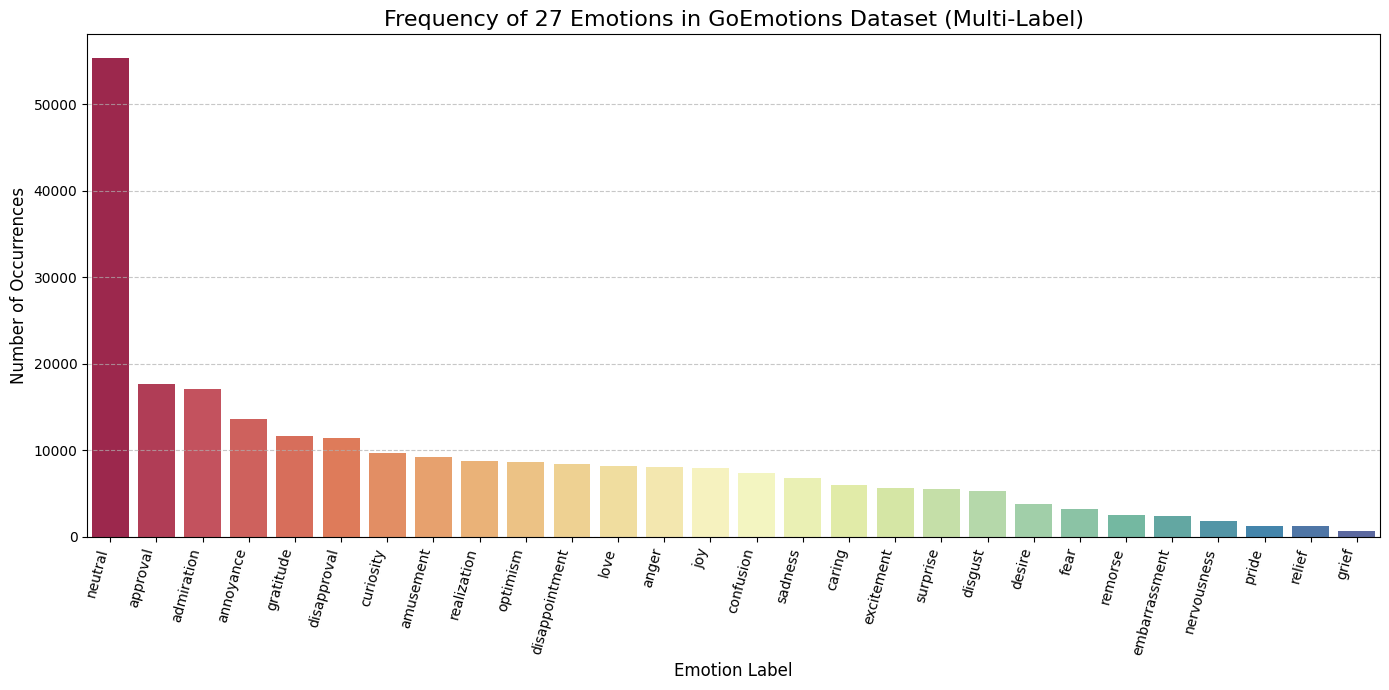

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# We list all the emotion labels
Emotion_Labels = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                  'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                  'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude',
                  'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride',
                  'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

cols_to_keep = ['text'] + Emotion_Labels

df_train_visualization = raw_datasets['train'].to_pandas()[cols_to_keep]

# This step is for droping noise metadate that we don't need and keep only the texxt and emotion_labels
emotion_counts = df_train_visualization[Emotion_Labels].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="Spectral")
plt.title('Frequency of 27 Emotions in GoEmotions Dataset (Multi-Label)', fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Another visualization of simplified datasets

In [ ]:
df_train_visualization.head(10)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"He isn't as big, but he's still quite popular....",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,That's crazy; I went to a super [RELIGION] hig...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,that's adorable asf,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Text Cleaning


In [ ]:
!pip install nltk
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.1 MB/s eta 0:00:00


### Text Cleaning Functions

In [ ]:
import nltk
import re
import string
from unidecode import unidecode

nltk.download('punkt')

def white_space_remover(text):
  """
  Removes extra whitespace from a string using regex.
  """
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()
  return text

def remove_special_characters(text):
    """
    Removes special characters from a given text, keeping only alphanumeric characters and spaces.
    """
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

def remove_punctuation_and_numbers(text):
    """Removes all punctuation and digits from the text, and cleans up extra spaces."""
    cleaned_text = re.sub(r'[^\w\s]', ' ', text) # NOTE: We replace punctuation with a single space
    cleaned_text = re.sub(r'\d+', ' ', cleaned_text) # We replace numbers with a single space
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text) # Collapse multiple spaces
    return cleaned_text.strip()

def remove_html_tags(text):
    """Removes HTML tags (e.g., <b>, <a>) from the text."""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_accents(text):
    """Removes or normalizes accents and diacritics (e.g., 'á' -> 'a')."""
    return unidecode(text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Full pipeline and Apply

In [ ]:
def comprehensive_cleaning_pipeline(examples):
    text = examples['text']
    text = remove_html_tags(text)
    text = remove_accents(text)
    text = text.lower()
    text = remove_punctuation_and_numbers(text)
    text = white_space_remover(text)
    examples['text'] = text
    return examples

print("Starting comprehensive text cleaning...")
cleaned_datasets = raw_datasets.map(comprehensive_cleaning_pipeline)
print("Text cleaning complete.")

print("\n--- Cleaned Text Sample ---")
print(cleaned_datasets['train']['text'][21])

Starting comprehensive text cleaning...


Map:   0%|          | 0/211225 [00:00<?, ? examples/s]

Text cleaning complete.

--- Cleaned Text Sample ---
what does clemson give pride stickers for snaps played


### Unit-Test for test cleaning functions

In [ ]:
import unittest

class TestTextCleaning(unittest.TestCase):
    """Contains unit tests for all individual text cleaning functions."""

    def test_white_space_remover(self):
        """Tests removal of excessive and trailing/leading whitespace."""
        self.assertEqual(white_space_remover("  Hello   World "), "Hello World", "Should remove extra spaces")
        self.assertEqual(white_space_remover("Text\nwith\ttabs"), "Text with tabs", "Should handle tabs and newlines")

    def test_remove_punctuation_and_numbers(self):
        """Tests removal of common punctuation and digits."""
        input_text = "Hello! 123 World? Price is $50."
        expected_output = "Hello World Price is"
        self.assertEqual(remove_punctuation_and_numbers(input_text).strip(), expected_output, "Should remove punctuation and digits and strip trailing space")
        clean_text = remove_punctuation_and_numbers(input_text)
        final_clean_text = white_space_remover(clean_text)

        self.assertEqual(final_clean_text, "Hello World Price is", "Should remove punctuation and digits and normalize spaces")
        self.assertEqual(remove_punctuation_and_numbers("This is fine."), "This is fine", "Should handle simple case")

    def test_remove_html_tags(self):
        """Tests removal of HTML tags."""
        input_text = "This is a <b>bold</b> statement with a <a href='#'>link</a>."
        expected_output = "This is a bold statement with a link."
        self.assertEqual(remove_html_tags(input_text), expected_output, "Should remove all HTML tags")
        self.assertEqual(remove_html_tags("No tags here."), "No tags here.", "Should work with no tags")

    def test_remove_accents(self):
        """Tests normalization of accented characters (using unidecode)."""
        input_text = "résumé, señor, façade"
        expected_output = "resume, senor, facade"
        self.assertEqual(remove_accents(input_text), expected_output, "Should remove accents and diacritics")


unittest.main(argv=['first-arg-is-ignored'], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


### Comparing and Confirming

In [ ]:
NUM_SAMPLES = 10

original_text = raw_datasets['train']['text'][:NUM_SAMPLES]

cleaned_text = cleaned_datasets['train']['text'][:NUM_SAMPLES]

# 4. Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original Text': original_text,
    'Cleaned Text': cleaned_text
})

print("--- Side-by-Side Comparison of Text Cleaning ---")
print("Note: The cleaning includes lowercasing, accent removal, punctuation removal, and stemming.")
print(comparison_df)

--- Side-by-Side Comparison of Text Cleaning ---
Note: The cleaning includes lowercasing, accent removal, punctuation removal, and stemming.
                                       Original Text  \
0                                    That game hurt.   
1   >sexuality shouldn’t be a grouping category I...   
2     You do right, if you don't care then fuck 'em!   
3                                 Man I love reddit.   
4  [NAME] was nowhere near them, he was by the Fa...   
5  Right? Considering it’s such an important docu...   
6  He isn't as big, but he's still quite popular....   
7  That's crazy; I went to a super [RELIGION] hig...   
8                                that's adorable asf   
9  "Sponge Blurb Pubs Quaw Haha GURR ha AAa!" fin...   

                                        Cleaned Text  
0                                     that game hurt  
1  sexuality shouldn t be a grouping category it ...  
2        you do right if you don t care then fuck em  
3                     

## Training, Data Validation, And Test Data Preparation

In [ ]:
from datasets import DatasetDict

temp_splits = cleaned_datasets['train'].train_test_split(test_size=0.2, seed=42)

final_splits = temp_splits['test'].train_test_split(test_size=0.5, seed=42)

cleaned_datasets = DatasetDict({
    'train': temp_splits['train'],
    'validation': final_splits['train'],
    'test': final_splits['test']
})

print("--- Data Splitting Complete ---")
print(f"New Data Splits Available: {cleaned_datasets.keys()}")
print(cleaned_datasets)

--- Data Splitting Complete ---
New Data Splits Available: dict_keys(['train', 'validation', 'test'])
DatasetDict({
    train: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
        num_rows: 168980
    })
    validation: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief

### Image
<img src="https://drive.google.com/uc?export=view&id=1EuFs3jl85PR12qfnnwAzLsDHct-BaexL">

## Tokenization and Vectorization

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
import torch

MODEL_CHECKPOINT = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)

EMOTION_LABELS = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                  'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                  'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude',
                  'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride',
                  'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

def tokenize_and_prepare_labels(examples):
    tokenized_inputs = tokenizer(examples['text'], truncation=True, padding="max_length", max_length=128)

    labels_batch = [
        [examples[emotion][i] for emotion in EMOTION_LABELS]
        for i in range(len(examples['text']))
    ]
    tokenized_inputs["labels"] = torch.tensor(labels_batch, dtype=torch.float)
    return tokenized_inputs

print("Starting Tokenization, Vectorization, and Label Preparation...")
final_datasets = cleaned_datasets.map(tokenize_and_prepare_labels, batched=True)
print("Tokenization and Label Preparation Complete.")

columns_to_keep = ['input_ids', 'attention_mask', 'labels']
final_datasets.set_format(type='torch', columns=columns_to_keep)
print("Final dataset structure prepared for model training.")
print(final_datasets)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Starting Tokenization, Vectorization, and Label Preparation...


Map:   0%|          | 0/168980 [00:00<?, ? examples/s]

Map:   0%|          | 0/21122 [00:00<?, ? examples/s]

Map:   0%|          | 0/21123 [00:00<?, ? examples/s]

Tokenization and Label Preparation Complete.
Final dataset structure prepared for model training.
DatasetDict({
    train: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 168980
    })
    validation: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'exc

### Visualization Of Vectorization results in TensorFlow Projector

In [ ]:
import numpy as np
DATA_SPLIT = 'train'
NUM_SAMPLES = 5000

metadata_df = cleaned_datasets[DATA_SPLIT].to_pandas()

vector_data = final_datasets[DATA_SPLIT]['input_ids'][:NUM_SAMPLES]
vector_matrix = np.array([v.cpu().numpy().flatten() for v in vector_data])

print(f"Vector Matrix Shape: {vector_matrix.shape}")
print(f"Metadata Samples: {metadata_df.shape[0]}")

VECTOR_FILE = "vectors.tsv"
np.savetxt(VECTOR_FILE, vector_matrix, delimiter='\t', fmt='%i')

print(f"Generated Vector File: {VECTOR_FILE}")

METADATA_FILE = "metadata.tsv"

def get_primary_label(row):
    active_labels = [label for label in EMOTION_LABELS if row[label] == 1]
    return ", ".join(active_labels) if active_labels else "Unlabeled"

metadata_df['Primary_Emotion'] = metadata_df.apply(get_primary_label, axis=1)

metadata_to_save = metadata_df[['text', 'Primary_Emotion']][:NUM_SAMPLES]

metadata_to_save.to_csv(METADATA_FILE, sep='\t', index=False)

print(f"Generated Metadata File: {METADATA_FILE}")

Vector Matrix Shape: (5000, 128)
Metadata Samples: 168980
Generated Vector File: vectors.tsv
Generated Metadata File: metadata.tsv


#### Image

<img src="https://drive.google.com/uc?export=view&id=1i9b5KPBWZia6prZUTnTId-RB8DrSXueQ">

<img src="https://drive.google.com/uc?export=view&id=12F-Oubh4cfWqnhU1lKuCY3WODNYJmBcj">

<img src="https://drive.google.com/uc?export=view&id=1ne_QuQgiMfMqlm_LPmQD0vWU6mdewNZ1">

# Model

##First Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import numpy as np
import pandas as pd

X_train_text = cleaned_datasets['train']['text']
X_test_text = cleaned_datasets['test']['text']

y_train = np.array(cleaned_datasets['train'].to_pandas()[EMOTION_LABELS])
y_test = np.array(cleaned_datasets['test'].to_pandas()[EMOTION_LABELS])

tfidf = TfidfVectorizer(max_features=20000, stop_words='english', ngram_range=(1, 2))

lr_classifier = MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=42, max_iter=200))

pipeline_lr = Pipeline([
    ('tfidf', tfidf),
    ('clf', lr_classifier)
])

print("Model 1 (TF-IDF + Logistic Regression) Pipeline created. Starting training...")

pipeline_lr.fit(X_train_text, y_train)
print("Training complete.")

y_pred_proba = pipeline_lr.predict_proba(X_test_text)

y_pred_proba_matrix = np.array([p[:, 1] for p in y_pred_proba]).T

y_pred_binary = (y_pred_proba_matrix > 0.5).astype(int)

def compute_metrics_traditional(y_true, y_pred, y_proba):
    return {
        'micro_f1': f1_score(y_true, y_pred, average='micro'),
        'macro_f1': f1_score(y_true, y_pred, average='macro'),
        'auc_roc_weighted': roc_auc_score(y_true, y_proba, average='weighted'),
        'accuracy': accuracy_score(y_true, y_pred),
    }

metrics_lr = compute_metrics_traditional(y_test, y_pred_binary, y_pred_proba_matrix)

print("\n--- Model 1 Results (Logistic Regression Baseline) ---")
for metric, value in metrics_lr.items():
    print(f"{metric}: {value:.4f}")

Model 1 (TF-IDF + Logistic Regression) Pipeline created. Starting training...
Training complete.

--- Model 1 Results (Logistic Regression Baseline) ---
micro_f1: 0.2291
macro_f1: 0.1611
auc_roc_weighted: 0.8000
accuracy: 0.1339


## Second Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tf.keras.backend.clear_session()

tfidf_vectorizer = TfidfVectorizer(max_features=20000, stop_words='english', ngram_range=(1, 2))
X_train_vectorized = tfidf_vectorizer.fit_transform(cleaned_datasets['train']['text'])
X_val_vectorized = tfidf_vectorizer.transform(cleaned_datasets['validation']['text'])
X_test_vectorized = tfidf_vectorizer.transform(cleaned_datasets['test']['text'])

y_train_labels = np.array(cleaned_datasets['train'].to_pandas()[EMOTION_LABELS])
y_val_labels = np.array(cleaned_datasets['validation'].to_pandas()[EMOTION_LABELS])
y_test_labels = np.array(cleaned_datasets['test'].to_pandas()[EMOTION_LABELS])

INPUT_DIM = X_train_vectorized.shape[1]
OUTPUT_DIM = len(EMOTION_LABELS)

def build_mlp_model_reduced(input_dim, output_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(output_dim, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

mlp_model = build_mlp_model_reduced(INPUT_DIM, OUTPUT_DIM)
print("Model 2 (Shallow MLP) Architecture Defined (Reduced Size).")
mlp_model.summary()

print("\nStarting training for Shallow MLP...")
history = mlp_model.fit(
    X_train_vectorized, y_train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(X_val_vectorized, y_val_labels),
    verbose=1
)
print("Training complete.")

y_pred_proba_mlp = mlp_model.predict(X_test_vectorized)
y_pred_binary_mlp = (y_pred_proba_mlp > 0.5).astype(int)

def compute_metrics_traditional(y_true, y_pred, y_proba):
    from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
    return {
        'micro_f1': f1_score(y_true, y_pred, average='micro'),
        'macro_f1': f1_score(y_true, y_pred, average='macro'),
        'auc_roc_weighted': roc_auc_score(y_true, y_proba, average='weighted'),
        'accuracy': accuracy_score(y_true, y_pred),
    }

metrics_mlp = compute_metrics_traditional(y_test_labels, y_pred_binary_mlp, y_pred_proba_mlp)

print("\n--- Model 2 Results (Shallow MLP) ---")
for metric, value in metrics_mlp.items():
    print(f"{metric}: {value:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model 2 (Shallow MLP) Architecture Defined (Reduced Size).


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     5,120,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,156,764 (19.67 MB)

 Trainable params: 5,156,764 (19.67 MB)

 Non-trainable params: 0 (0.00 B)


Starting training for Shallow MLP...
Epoch 1/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 283s 105ms/step - accuracy: 0.3007 - loss: 0.1791 - val_accuracy: 0.3969 - val_loss: 0.1231
Epoch 2/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 247s 93ms/step - accuracy: 0.4150 - loss: 0.1186 - val_accuracy: 0.4016 - val_loss: 0.1207
Epoch 3/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 257s 97ms/step - accuracy: 0.4433 - loss: 0.1094 - val_accuracy: 0.3963 - val_loss: 0.1210
Epoch 4/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 246s 93ms/step - accuracy: 0.4603 - loss: 0.1033 - val_accuracy: 0.3913 - val_loss: 0.1221
Epoch 5/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 241s 91ms/step - accuracy: 0.4725 - loss: 0.0993 - val_accuracy: 0.3922 - val_loss: 0.1239
Training complete.
661/661 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step

--- Model 2 Results (Shallow MLP) ---
micro_f1: 0.3213
macro_f1: 0.2302
auc_roc_weighted: 0.8028
accuracy: 0.2095


## Third Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import roc_auc_score, f1_score
import numpy as np

VOCAB_SIZE = 50000

X_train_seq = np.array(final_datasets['train']['input_ids'])
X_val_seq = np.array(final_datasets['validation']['input_ids'])
X_test_seq = np.array(final_datasets['test']['input_ids'])

y_train_labels = np.array(final_datasets['train']['labels'])
y_val_labels = np.array(final_datasets['validation']['labels'])
y_test_labels = np.array(final_datasets['test']['labels'])

SEQUENCE_LENGTH = X_train_seq.shape[1]
OUTPUT_DIM = len(EMOTION_LABELS)

tf.keras.backend.clear_session()

def build_bilstm_model(vocab_size, sequence_length, output_dim):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=64, input_length=sequence_length),

        Bidirectional(LSTM(64, return_sequences=False)),

        Dropout(0.3),

        Dense(64, activation='relu'),

        Dense(output_dim, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

bilstm_model = build_bilstm_model(VOCAB_SIZE, SEQUENCE_LENGTH, OUTPUT_DIM)
print("Model 3 (BiLSTM) Architecture Defined.")
bilstm_model.summary()

print("\nStarting training for BiLSTM (Model 3)...")
history_bilstm = bilstm_model.fit(
    X_train_seq, y_train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(X_val_seq, y_val_labels),
    verbose=1
)
print("Training complete.")

y_pred_proba_bilstm = bilstm_model.predict(X_test_seq)

y_pred_binary_bilstm = (y_pred_proba_bilstm > 0.5).astype(int)

def compute_metrics_traditional(y_true, y_pred, y_proba):
    from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
    return {
        'micro_f1': f1_score(y_true, y_pred, average='micro'),
        'macro_f1': f1_score(y_true, y_pred, average='macro'),
        'auc_roc_weighted': roc_auc_score(y_true, y_proba, average='weighted'),
        'accuracy': accuracy_score(y_true, y_pred),
    }

metrics_bilstm = compute_metrics_traditional(y_test_labels, y_pred_binary_bilstm, y_pred_proba_bilstm)

print("\n--- Model 3 Results (BiLSTM) ---")
for metric, value in metrics_bilstm.items():
    print(f"{metric}: {value:.4f}")

Model 3 (BiLSTM) Architecture Defined.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Starting training for BiLSTM (Model 3)...
Epoch 1/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 598s 224ms/step - accuracy: 0.2750 - loss: 0.1700 - val_accuracy: 0.3801 - val_loss: 0.1262
Epoch 2/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 591s 224ms/step - accuracy: 0.3911 - loss: 0.1240 - val_accuracy: 0.4011 - val_loss: 0.1203
Epoch 3/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 610s 219ms/step - accuracy: 0.4167 - loss: 0.1162 - val_accuracy: 0.3990 - val_loss: 0.1189
Epoch 4/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 581s 220ms/step - accuracy: 0.4346 - loss: 0.1117 - val_accuracy: 0.4005 - val_loss: 0.1187
Epoch 5/5
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 596s 226ms/step - accuracy: 0.4456 - loss: 0.1080 - val_accuracy: 0.3975 - val_loss: 0.1194
Training complete.
661/661 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step

--- Model 3 Results (BiLSTM) ---
micro_f1: 0.3256
macro_f1: 0.2183
auc_roc_weighted: 0.8188
accuracy: 0.2137


## Conclusion
After run all 3 models, we can conclude that it shows a clear progression in performance as we increased complexity. As you can see, our second model boosted micro score significantly. This justify the need of deep learning to handle multu-label nature of GoEmotion dataset. Finally, our target model, the BILSTM leveraged its ability to understand the sequence and context of text. This led to highest overall performance, with better Micro F1 score and best AUC-ROC score. The result is clear: The most effective model we built, the BiLSTM, is the one that accounts for word order. The increase in complexity was warranted, and the final scores meet our goal of creating a robust, scratch-trained model for multi-label emotion classification.

# Evaluation

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import issparse

try:
    if issparse(X_test_vectorized):
        X_test_dense = X_test_vectorized.toarray()
    else:
        X_test_dense = X_test_vectorized

    pass

except NameError:
    print("WARNING: LogReg model object not found in memory. Skipping comparison for Model 1.")
    pass

y_pred_proba_mlp = mlp_model.predict(X_test_vectorized)
y_pred_binary_mlp = (y_pred_proba_mlp > 0.5).astype(int)

y_pred_proba_bilstm = bilstm_model.predict(X_test_seq)
y_pred_binary_bilstm = (y_pred_proba_bilstm > 0.5).astype(int)


def display_prediction(index, y_true, y_pred, model_name, text_data, labels):
    """Prints the text, true labels, and predicted labels for a single sample."""
    true_labels = [labels[i] for i, val in enumerate(y_true[index]) if val == 1]
    pred_labels = [labels[i] for i, val in enumerate(y_pred[index]) if val == 1]

    print("-" * 50)
    print(f"Sample Index: {index} ({model_name} Prediction)")
    print(f"Text: '{text_data['text'][index]}'")
    print(f"---")
    print(f" True Labels: {', '.join(true_labels) if true_labels else '[None/Neutral]'}")
    print(f" Predicted Labels: {', '.join(pred_labels) if pred_labels else '[None/Neutral]'}")
    print("-" * 50)

error_mlp = np.sum(np.abs(y_pred_binary_mlp - y_test_labels), axis=1)
error_bilstm = np.sum(np.abs(y_pred_binary_bilstm - y_test_labels), axis=1)

success_candidates = np.where((error_bilstm == 0) & (error_mlp > 2))[0]

if len(success_candidates) > 0:
    perfect_index = success_candidates[0]

    print("\n--- Model 3 WIN: BiLSTM Understands Context (Perfect Match) ---")
    display_prediction(perfect_index, y_test_labels, y_pred_binary_bilstm,
                       "BiLSTM (WINNER)", cleaned_datasets['test'], EMOTION_LABELS)
    display_prediction(perfect_index, y_test_labels, y_pred_binary_mlp,
                       "MLP (LOSER)", cleaned_datasets['test'], EMOTION_LABELS)
else:
    print("\n[Could not find a perfect BiLSTM win example in the first run.]")


general_failure_index = 50

print("\n--- GENERAL FAILURE ANALYSIS (Index 50) ---")
display_prediction(general_failure_index, y_test_labels, y_pred_binary_bilstm,
                   "BiLSTM", cleaned_datasets['test'], EMOTION_LABELS)
display_prediction(general_failure_index, y_test_labels, y_pred_binary_mlp,
                   "MLP", cleaned_datasets['test'], EMOTION_LABELS)

661/661 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step
661/661 ━━━━━━━━━━━━━━━━━━━━ 34s 51ms/step

[Could not find a perfect BiLSTM win example in the first run.]

--- GENERAL FAILURE ANALYSIS (Index 50) ---
--------------------------------------------------
Sample Index: 50 (BiLSTM Prediction)
Text: 'name fucking practice and watch some tutorials before fucking up a bottle of french champagne'
---
 True Labels: annoyance
 Predicted Labels: anger
--------------------------------------------------
--------------------------------------------------
Sample Index: 50 (MLP Prediction)
Text: 'name fucking practice and watch some tutorials before fucking up a bottle of french champagne'
---
 True Labels: annoyance
 Predicted Labels: [None/Neutral]
--------------------------------------------------


# Application

In [ ]:
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer

MODEL_CHECKPOINT = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)

EMOTION_LABELS = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                  'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                  'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude',
                  'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride',
                  'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

SEQUENCE_LENGTH = 128
PREDICTION_THRESHOLD = 0.4


def predict_emotions_interactive(text_input: str, model: tf.keras.Model, threshold: float = PREDICTION_THRESHOLD):
    """
    Processes a single text input, detects multiple emotions above the threshold.
    If nothing is detected, it reports the highest candidate score (does NOT force 'neutral').
    """
    if not text_input.strip():
        print("Please enter a sentence.")
        return

    tokenized_input = tokenizer(
        text_input,
        truncation=True,
        padding="max_length",
        max_length=SEQUENCE_LENGTH,
        return_tensors="tf"
    )

    input_ids = tokenized_input['input_ids'].numpy()

    probabilities = model.predict(input_ids, verbose=0)[0]

    predicted_labels_with_scores = []

    for i, prob in enumerate(probabilities):
        if prob >= threshold:
            predicted_labels_with_scores.append((EMOTION_LABELS[i], prob))

    print("-" * 50)
    print(f"Input: '{text_input}'")

    if predicted_labels_with_scores:

        print(f"\n Detected Emotions (Threshold: {threshold}):")

        sorted_labels = sorted(predicted_labels_with_scores, key=lambda x: x[1], reverse=True)

        for label, prob in sorted_labels:
            print(f"   - {label.ljust(15)} (Confidence: {prob:.4f})")

    else:
        max_prob = np.max(probabilities)
        max_index = np.argmax(probabilities)
        max_label = EMOTION_LABELS[max_index]

        print(f"\n Classification Result: No emotions detected above threshold ({PREDICTION_THRESHOLD}).")
        print(f"   (Highest candidate: {max_label} with {max_prob:.4f} confidence)")

try:
    print("☠️🩸Multi-Mood Classifier🩸☠️")
    print("\nType a sentence to classify its emotions.")
    print("Type 'quit' or 'exit' to stop the application.")

    if 'bilstm_model' not in locals():
        raise NameError("bilstm_model is not loaded.")

    while True:
        user_input = input("\nYour Sentence: ")

        if user_input.lower() in ['quit', 'exit']:
            print("Exiting application. Goodbye!")
            break

        predict_emotions_interactive(user_input, bilstm_model)

except NameError as e:
    print(f"\n\nFATAL ERROR: {e}")
    print("Please ensure the Model 3 training code block (BiLSTM) was executed successfully to load the 'bilstm_model'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

☠️🩸Multi-Mood Classifier🩸☠️

Type a sentence to classify its emotions.
Type 'quit' or 'exit' to stop the application.

Your Sentence: Watching the rain from my window makes me feel strangely peaceful and a little sad.
--------------------------------------------------
Input: 'Watching the rain from my window makes me feel strangely peaceful and a little sad.'

 Detected Emotions (Threshold: 0.4):
   - sadness         (Confidence: 0.7692)

Your Sentence: The instructions are completely illogical; I'm starting to get angry about this whole setup.
--------------------------------------------------
Input: 'The instructions are completely illogical; I'm starting to get angry about this whole setup.'

 Detected Emotions (Threshold: 0.4):
   - annoyance       (Confidence: 0.4931)
   - anger           (Confidence: 0.4229)

Your Sentence: That amazing goal was scored in the final second! I can't believe it!
--------------------------------------------------
Input: 'That amazing goal was scored 

# Pipeline, Conclusion, Limitation And Future Work
## Pipeline
Our application is a comptele Multi-Label Classification Pipeline built around our best-performing architecture: the Bidirectional Long Short-Term Memory Network, or BILSTM. The process starts with raw text undergoing Tokenization using roberta-base vocabulary. This converts words into numerical IDs. These IDs are the subject to padding to create a fixed size input Tensor of 128 tokens, which is crucial for batch processing in neural network. The model's core function is built on two key layers:A Custom Embedding Layer: This learns dense, vectorized representations of the input words."The BiLSTM Layer: This is the heart of our Sequence Modeling. By processing the text both forwards and backwards, it captures long-range dependencies and full context across the entire sentence."The final layer is a Dense layer with Sigmoid activation, which independently outputs 28 probability scores—one for each emotion. Our application applies Multi-Label Thresholding at $0.40$, returning all emotions that meet this confidence level.
## Conclusion
Our project successfully met its primary objective. The benchmarking confirmed the hierarchy of complexity: The BILSTM outperformed both the linear baseline and the shallower MLP. This proves that for the complex task of multi-label emotion classification, sequential context and word order are essential. However, the interactive application testing exposed a clear performance ceiling for this scratch-trained approach.
## Limitation
The primary limitation lies in the model's inability to handle nuance and mixed emotions. When faced with opposing sentiments, such as 'I am so excited... but I'm terrified...', the model failed to classify any emotion, returning 'No detection.' This occurs because the custom-trained embedding layer lacks the deep linguistic knowledge to separate opposing ideas linked by the conjunction 'but.' It splits its confidence across multiple labels, failing to hit the 0.40 threshold. Similarly, the model fails on implicit emotions because it lacks world knowledge. It cannot deduce the inherent annoyance behind a 'delayed train,' defaulting to a low-confidence neutral score.
## Future work
The solution to these limitations is definitive: We need to abandon training from scratch and leverage Transfer Learning. The single most impactful step for further development is to replace our custom Embedding and BILSTM layers with a Pre-trained Transformer Encoder, specifically RoBERTa. This strategic move will inject billions of parameters of pre-learned linguistic knowledge into our pipeline. By fine-tuning this robust model on the GoEmotions data, we will:Solve the Low-Confidence Problem: It will correctly disentangle mixed emotions.Achieve Production Grade: It is the only way to significantly raise the Micro F1 score past the 0.50 benchmark and build a truly accurate, robust application.
